## TBA, Social Media Scrapping


#### Data Collection from the web
Data can be collected using APIs, perticularly for social media 

Data can be “Scrapped” from any website


## Authentication

In [1]:
# Install the PRAW library
!pip install praw
# Upgrade pip to the latest version
!pip install --upgrade pip
# Import the PRAW library
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="R-qKfhuVBU7UcsXlhlNpyw",
    client_secret="RhR-_iTTP3fAnQAqL6aNHYbaCykXNg",
    user_agent=user_agent
)

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 220.2 kB/s eta 0:00:10
    --------------------------------------- 0.0/2.1 MB 245.8 kB/s eta 0:00:09
   -- ------------------------------------- 0.2/2.1 MB 833.5 kB/s eta 0:00:03
   ------------- -------------------------- 0.7/2.1 MB 3.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 5.8 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\dharm\anaconda3\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"movies"** subreddit channel will be use for this project

In [3]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("movies").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

2023 films ranked according to the /r/movies official discussion polls.
19cl7rd
LiteraryBoner
1705891467.0
240
0.91
https://www.reddit.com/r/movies/comments/19cl7rd/2023_films_ranked_according_to_the_rmovies/
0


**Get total comment in Subreddit**

In [4]:
headlines = set()
for submission in reddit.subreddit("movies").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

445


### Create a dataframe from the scrapped data

In [5]:
movies_df = pd.DataFrame(headlines)
movies_df.head()

,0
0,"""The Breakfast Club"": Does anyone think Claire..."
1,Evil Dead Rise
2,Anthropomorphism in horror movies
3,Open Wide - A24 Documentary | Netflix | Unoffi...
4,What's a Movie You Didn't Like Much on Your Fi...


### columns

In [6]:
movies_df.columns

RangeIndex(start=0, stop=1, step=1)

In [7]:
movies_df.columns = ['Titles']
movies_df.head()

,Titles
0,"""The Breakfast Club"": Does anyone think Claire..."
1,Evil Dead Rise
2,Anthropomorphism in horror movies
3,Open Wide - A24 Documentary | Netflix | Unoffi...
4,What's a Movie You Didn't Like Much on Your Fi...


### Next we have to remove emoji & Unicode from the reddit data.

In [8]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
movies_df["Titles"]= movies_df["Titles"].apply(remove_emoji)

#Show the clean text
movies_df.head()

,Titles
0,"""The Breakfast Club"": Does anyone think Claire..."
1,Evil Dead Rise
2,Anthropomorphism in horror movies
3,Open Wide - A24 Documentary | Netflix | Unoffi...
4,What's a Movie You Didn't Like Much on Your Fi...


## Remove Stop words

In [9]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# Assuming you have already defined the cancer_df DataFrame
# If not, replace the following line with the actual DataFrame creation code
# cancer_df = pd.DataFrame(headlines)

# Tokenize and remove stop words
movies_df['clean_tokens'] = movies_df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(movies_df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Titles  \
440                            Most timeless comedies?   
441                                   Best Car Movies?   
442  How often are screams edited in in post-produc...   
443                       Movies or shows set in Vegas   
444  What are some bad movies where the actors gave...   

                                     clean_tokens  
440                       [timeless, comedies, ?]  
441                        [Best, Car, Movies, ?]  
442  [often, screams, edited, post-production, ?]  
443                   [Movies, shows, set, Vegas]  
444                [bad, movies, actors, gave, ?]  


## Function to remove stop words

In [10]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download English stopwords
nltk.download('stopwords')

# Define the remove_stop function
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

# Assuming you have already defined the cancer_df DataFrame
# If not, replace the following line with the actual DataFrame creation code
# cancer_df = pd.DataFrame(headlines)

# Tokenize and remove stop words
movies_df['clean_tokens'] = movies_df['Titles'].apply(lambda x: remove_stop(word_tokenize(str(x))))

# Display the DataFrame with the cleaned tokens
print(movies_df[['Titles', 'clean_tokens']].tail())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Titles  \
440                            Most timeless comedies?   
441                                   Best Car Movies?   
442  How often are screams edited in in post-produc...   
443                       Movies or shows set in Vegas   
444  What are some bad movies where the actors gave...   

                                     clean_tokens  
440                       [timeless, comedies, ?]  
441                        [Best, Car, Movies, ?]  
442  [often, screams, edited, post-production, ?]  
443                   [Movies, shows, set, Vegas]  
444                [bad, movies, actors, gave, ?]  


## Pipeline

In [11]:
# Fetch Reddit data
headlines = []
for submission in reddit.subreddit("movies").hot(limit=None):
    headlines.append(submission.title)

# Create DataFrame from Reddit data
movies_df = pd.DataFrame({'Titles': headlines})

# Define the pipeline
def remove_stop(tokens):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    return [t for t in tokens if t.lower() not in stopwords]

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = remove_stop(tokens)
    return tokens

# Apply the pipeline to the 'Titles' column
movies_df['clean_tokens'] = movies_df['Titles'].apply(preprocess_text)

# Display the DataFrame with the processed tokens
print(movies_df[['Titles', 'clean_tokens']].head())

                                              Titles  \
0  2023 films ranked according to the /r/movies o...   
1  Official Discussion Megathread (Madame Web / B...   
2  Barry Keoghan to Star in Film From ‘Chernobyl’...   
3  Lupita Nyong’o, Chloe Grace Moretz to Play UFC...   
4  Robert Downey Jr. has been nominated for Chapl...   

                                        clean_tokens  
0  [2023, films, ranked, according, /r/movies, of...  
1  [official, discussion, megathread, (, madame, ...  
2  [barry, keoghan, star, film, ‘, chernobyl, ’, ...  
3  [lupita, nyong, ’, ,, chloe, grace, moretz, pl...  
4  [robert, downey, jr., nominated, chaplin, ,, t...  


In [12]:
print(movies_df['clean_tokens'].head())

0    [2023, films, ranked, according, /r/movies, of...
1    [official, discussion, megathread, (, madame, ...
2    [barry, keoghan, star, film, ‘, chernobyl, ’, ...
3    [lupita, nyong, ’, ,, chloe, grace, moretz, pl...
4    [robert, downey, jr., nominated, chaplin, ,, t...
Name: clean_tokens, dtype: object


In [30]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### Create a function to get the subjectivity

In [31]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
movies_df['Subjectivity'] = movies_df['Titles'].apply(getSubjectivity)
movies_df['Polarity'] = movies_df['Titles'].apply(getPolarity)

#Now display data
movies_df.head()

,Titles,clean_tokens,Subjectivity,Polarity
0,2023 films ranked according to the /r/movies o...,"[2023, films, ranked, according, /r/movies, of...",0.0,0.0
1,Official Discussion Megathread (Madame Web / B...,"[official, discussion, megathread, (, madame, ...",0.6,0.5
2,Barry Keoghan to Star in Film From ‘Chernobyl’...,"[barry, keoghan, star, film, ‘, chernobyl, ’, ...",1.0,0.0
3,"Lupita Nyong’o, Chloe Grace Moretz to Play UFC...","[lupita, nyong, ’, ,, chloe, grace, moretz, pl...",0.0,0.0
4,Robert Downey Jr. has been nominated for Chapl...,"[robert, downey, jr., nominated, chaplin, ,, t...",0.0,0.0


## Data Visualization

In [21]:
!pip install seaborn

In [32]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\dharm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dharm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dharm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129655 (\U0001fa77) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dharm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127801 (\N{ROSE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


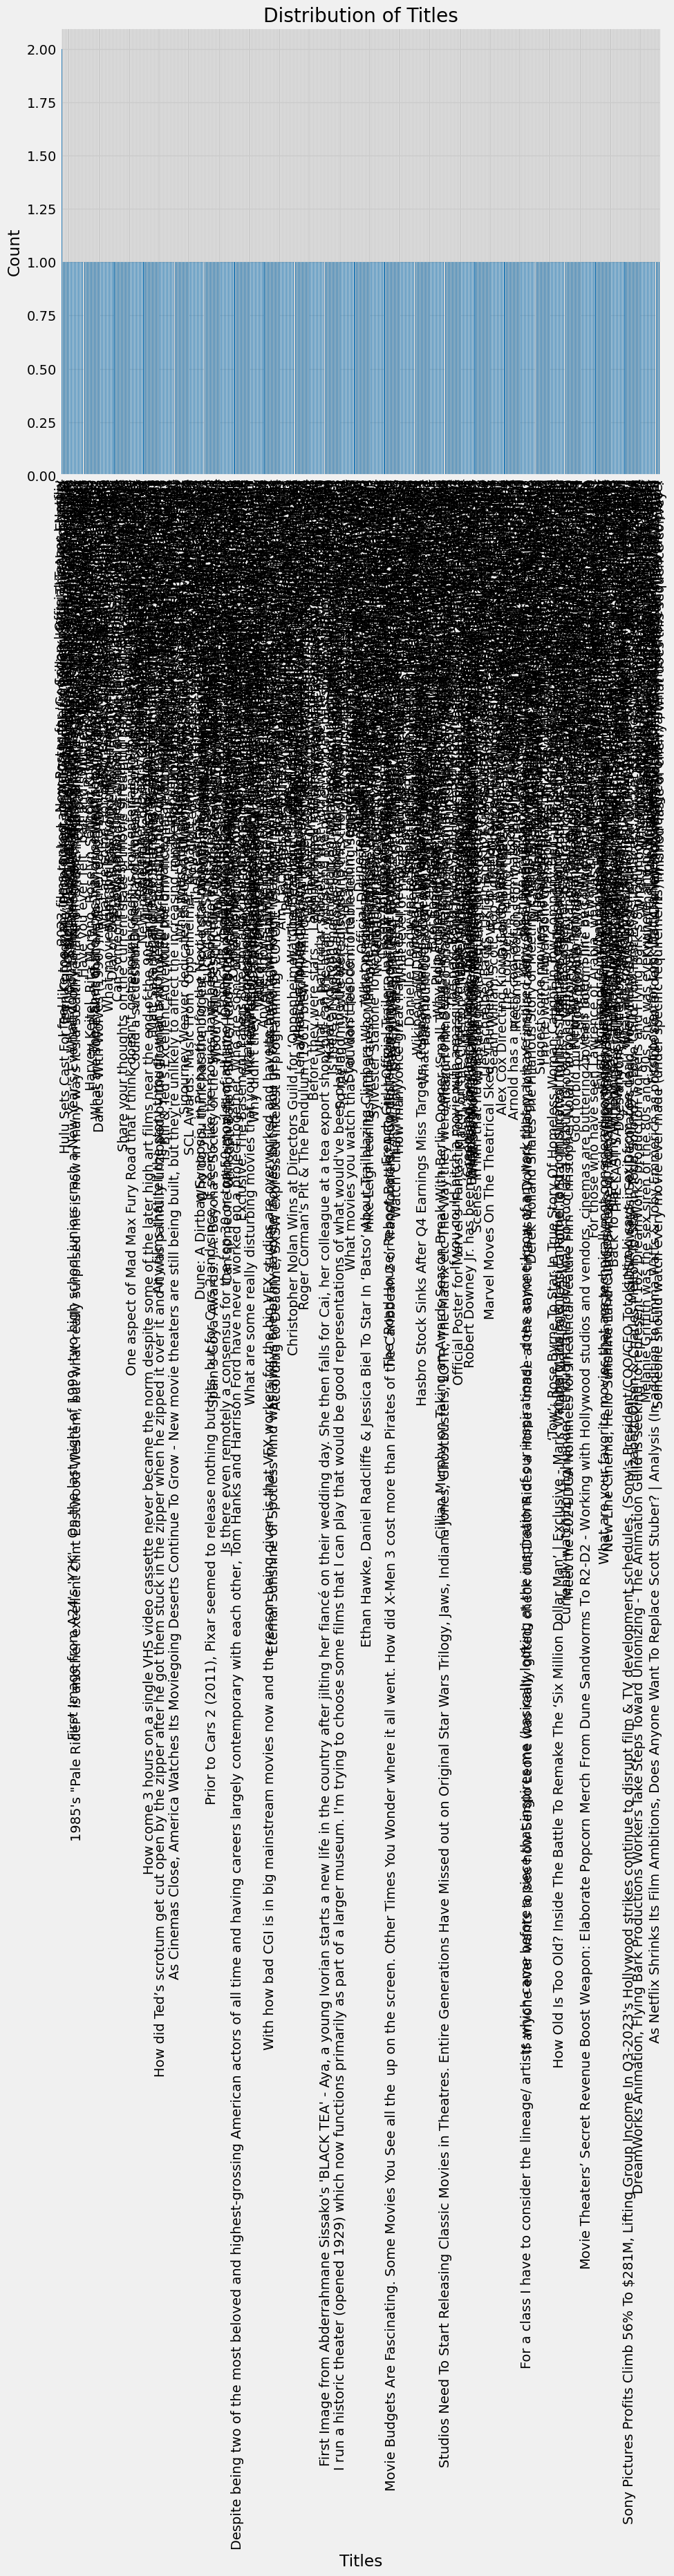

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming movies_df is already defined and contains your data
# Clean the text content in the "Titles" column
movies_df["Titles"] = movies_df["Titles"].str.replace("$$", "")

# Plot the distribution of titles
plt.figure(figsize=(10, 8))
movies_df["Titles"].value_counts().plot(kind="bar", color="#2078B4")
plt.xlabel("Titles")
plt.ylabel("Count")
plt.title("Distribution of Titles")
plt.show()




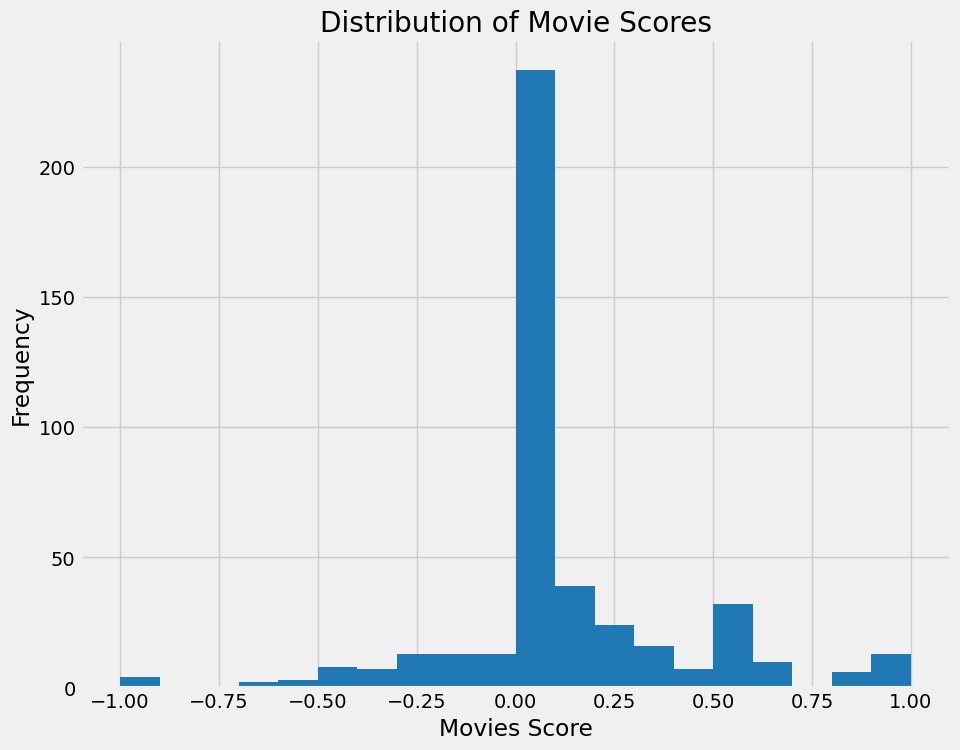

In [28]:
plt.figure(figsize=(10, 8))
movies_df["Polarity"].plot(kind="hist", bins=20, color="#2078B4")
plt.xlabel("Movies Score")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Scores")
plt.show()


# Wordcloud

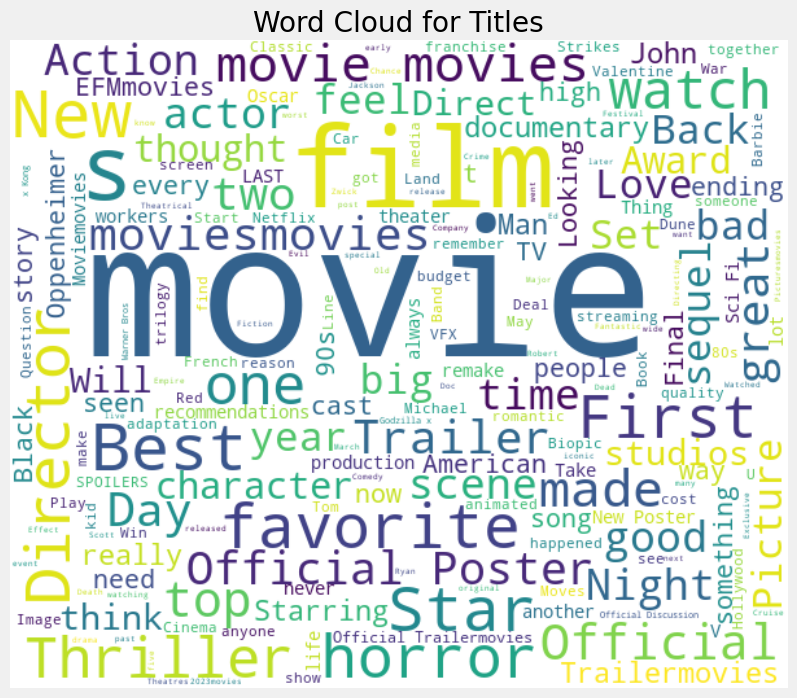

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate text values from the "Titles" column
text = 'movies '.join(movies_df["Titles"].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=600, height=500, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Titles")
plt.show()



## wordcloud theme in movie poster

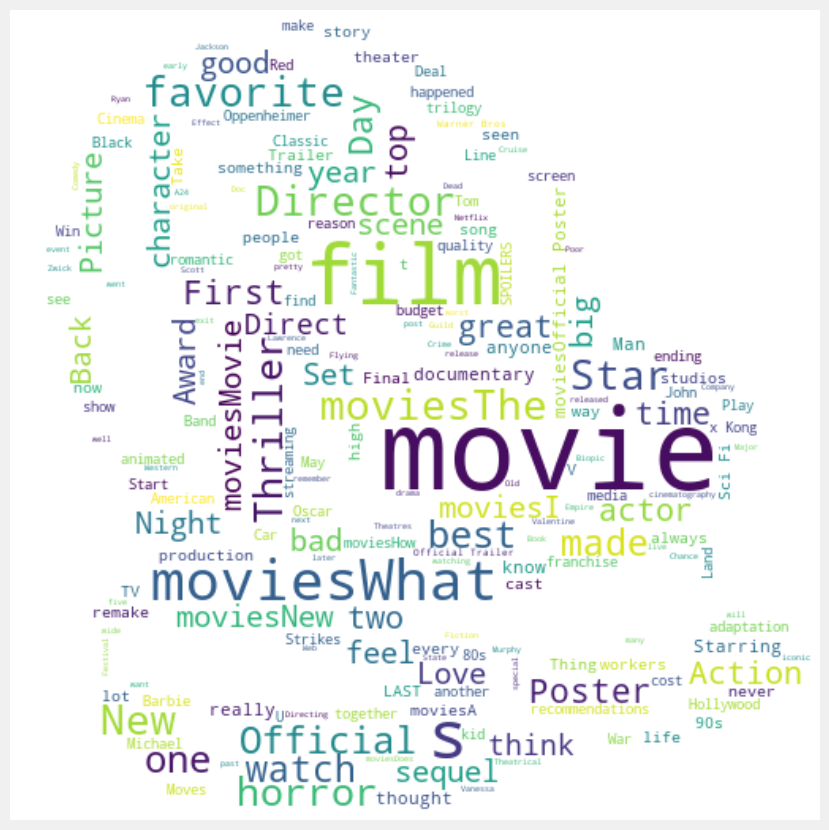

In [38]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

gun_mask = np.array(Image.open("C:/Users/dharm/Desktop/movie.png"))

# Concatenate text values from the "Titles" column
text = 'movies'.join(movies_df["Titles"].astype(str))


wc = WordCloud(mask=gun_mask, background_color='white', contour_width=0, contour_color='black').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



# wordcloud theme in rifles shape¶

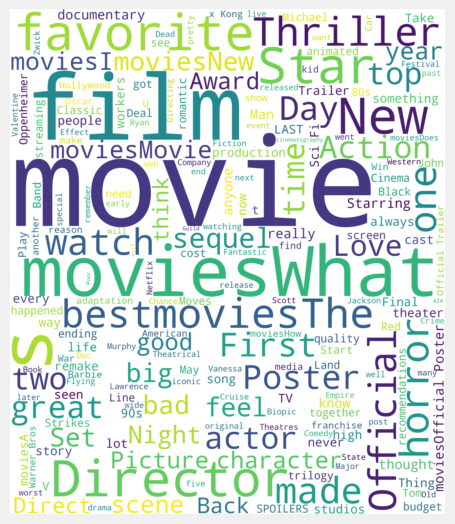

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Read the gun-shaped mask image
gun_mask = np.array(Image.open("C:/Users/dharm/Desktop/12.png"))

# Generate the word cloud using the gun-shaped mask
wordcloud = WordCloud(mask=gun_mask, contour_color='steelblue', background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(5,8 ))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Get the Bing liu Lexicon

In [40]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import pandas as pd

# Download the Opinion Lexicon
nltk.download('opinion_lexicon')

# Assuming you have a DataFrame named bitcoin_df with a 'Titles' column
# Replace 'Titles' with your actual column name if different

# Tokenize and calculate sentiment scores
movies_df['clean_tokens'] = movies_df['Titles'].apply(lambda x: word_tokenize(str(x)))
movies_df['positive_score'] = movies_df['clean_tokens'].apply(lambda tokens: sum(1 for word in tokens if word in opinion_lexicon.positive()))
movies_df['negative_score'] = movies_df['clean_tokens'].apply(lambda tokens: sum(1 for word in tokens if word in opinion_lexicon.negative()))

# Calculate a sentiment score (positive - negative)
movies_df['sentiment_score'] = movies_df['positive_score'] - movies_df['negative_score']

# Display the DataFrame with sentiment scores
print(movies_df[['Titles', 'positive_score', 'negative_score', 'sentiment_score']].head())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\dharm\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


                                              Titles  positive_score  \
0  2023 films ranked according to the /r/movies o...               0   
1  Official Discussion Megathread (Madame Web / B...               0   
2  Barry Keoghan to Star in Film From ‘Chernobyl’...               0   
3  Lupita Nyong’o, Chloe Grace Moretz to Play UFC...               0   
4  Robert Downey Jr. has been nominated for Chapl...               0   

   negative_score  sentiment_score  
0               0                0  
1               0                0  
2               0                0  
3               0                0  
4               0                0  


In [42]:
# Print the DataFrame
print(movies_df)

# Print summary information
print(movies_df.info())


                                                Titles  \
0    2023 films ranked according to the /r/movies o...   
1    Official Discussion Megathread (Madame Web / B...   
2    Barry Keoghan to Star in Film From ‘Chernobyl’...   
3    Lupita Nyong’o, Chloe Grace Moretz to Play UFC...   
4    Robert Downey Jr. has been nominated for Chapl...   
..                                                 ...   
442                   Question about The Parallax View   
443  Flash Dance had a prominence in this year's Su...   
444  Why didn’t they make a third movie to make a t...   
445  What are great horror films that don’t have go...   
446  Finished Taste of cherry , what does this sequ...   

                                          clean_tokens  Subjectivity  \
0    [2023, films, ranked, according, to, the, /r/m...         0.000   
1    [Official, Discussion, Megathread, (, Madame, ...         0.600   
2    [Barry, Keoghan, to, Star, in, Film, From, ‘, ...         1.000   
3    [Lupita, N